<a href="https://colab.research.google.com/github/Gauravjha2900/Charts_CNN_Based_MultiClassification/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
!pip install tensorflow==2.4.1
!pip install keras==2.4.3
import tensorflow as tf
import os
import cv2
import numpy as np
from random import randint
import seaborn as sn
!pip install segmentation-models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
!pip install livelossplot==0.5.2
from livelossplot import PlotLossesKeras
from livelossplot.keras import PlotLossesCallback
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.3 MB 13 kB/s 
     |████████████████████████████████| 462 kB 70.6 MB/s 
     |████████████████████████████████| 3.8 MB 45.3 MB/s 
     |████████████████████████████████| 14.8 MB 26.2 MB/s 
     |████████████████████████████████| 2.9 MB 48.4 MB/s 
     |████████████████████████████████| 132 kB 75.6 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68722 sha256=ccb6bf9fcd83ec01bdac69e6a34fc67a555b5a849b64525127459317fb0f5e44
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
CLASSES, charts = [], [] # names of classes, count of images for each class

for root, dirs, files in os.walk('/content/drive/MyDrive/chart_dataset/train'):
    f = os.path.basename(root)    # get class name - pie, line, etc.,    
        
    if len(files) > 0:
        charts.append(len(files))
        if f not in CLASSES:
            CLASSES.append(f) # add folder name
    
charts_count = len(CLASSES) # 87 = number of classes
print('{} classes with {} images in total'.format(len(CLASSES), sum(charts)))

5 classes with 1000 images in total


In [4]:
def read_imgs_lbls(_dir):
    Images, Labels = [], []
    for root, dirs, files in os.walk(_dir):
        f = os.path.basename(root)  # get class name - Amethyst, Onyx, etc       
        for file in files:
            Labels.append(f)
            image = cv2.imread(root+'/'+file)              
            Images.append(image)
    Images = np.array(Images)
    return (Images, Labels)

def get_class_index(Labels):
    for i, n in enumerate(Labels):
        for j, k in enumerate(CLASSES):    # foreach CLASSES
            if n == k:
                Labels[i] = j
    Labels = np.array(Labels)
    return Labels    

In [5]:
Train_Imgs, Train_Lbls = read_imgs_lbls("/content/drive/MyDrive/chart_dataset/train")
Train_Lbls = get_class_index(Train_Lbls)
print('Shape of train images: {}'.format(Train_Imgs.shape))
print('Shape of train labels: {}'.format(Train_Lbls.shape))

Shape of train images: (1000, 128, 128, 3)
Shape of train labels: (1000,)


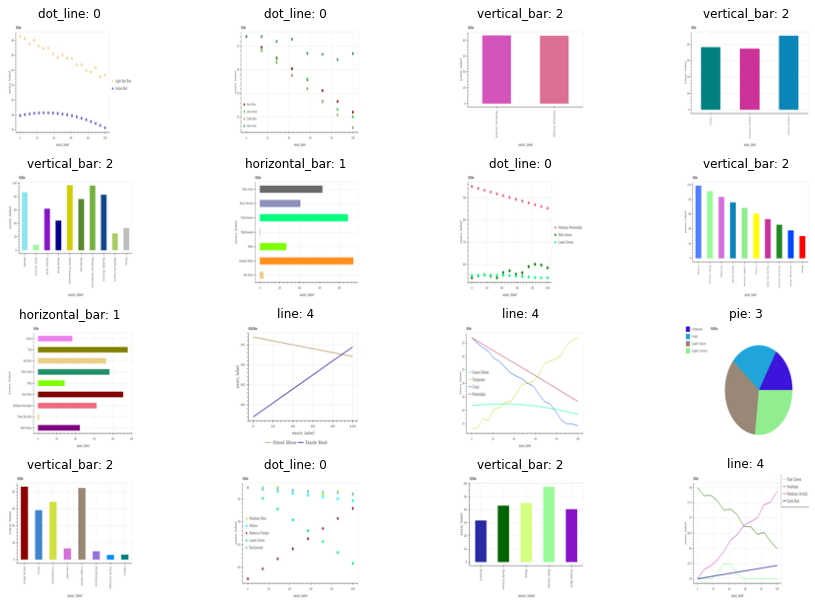

In [6]:
dim = 4 #  4x4 dimension flat plot
f,ax = plt.subplots(dim,dim) 
f.subplots_adjust(0,0,2,2)
for i in range(0,dim):
    for j in range(0,dim):
        rnd_number = randint(0,len(Train_Imgs))
        cl = Train_Lbls[rnd_number]
        ax[i,j].imshow(Train_Imgs[rnd_number])
        ax[i,j].set_title(CLASSES[cl]+': ' + str(cl))
        ax[i,j].axis('off')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Train_Imgs, Train_Lbls, shuffle = True, test_size = 0.2, random_state = 42)
print('Shape of X_train: {}, y_train: {} '.format(X_train.shape, y_train.shape))
print('Shape of X_val: {}, y_val: {} '.format(X_val.shape, y_val.shape))

Shape of X_train: (800, 128, 128, 3), y_train: (800,) 
Shape of X_val: (200, 128, 128, 3), y_val: (200,) 


#Task 4

##Image augmentation

Image augmentation is a creation of additional training data based on existing images, for example translation, rotation, flips and zoom.

As far as there are not so many samples for every class add a train data generator using class **ImageDataGenerator** with augmentation parameters. Using **ImageDataGenerator** class from Keras library create additional images of each gemstone class in the memory.


In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(              # this is the augmentation configuration used for training
        rotation_range=25,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True
        )

val_datagen = ImageDataGenerator()       

the original image + examples of work of ImageDataGenerator:

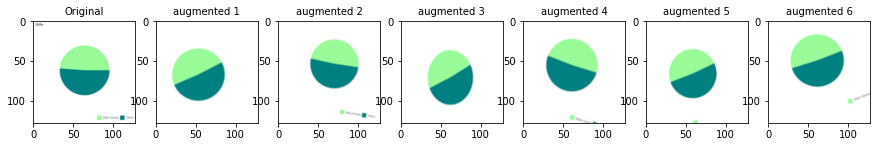

In [10]:
n = randint(0,len(X_train))
samples = np.expand_dims(X_train[n], 0)
it = train_datagen.flow(samples, batch_size=32)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title('Original', fontsize=10)

for i in range(1,cols):
    batch = it.next()    # generate batch of images 
    image = batch[0].astype('uint32') # convert to unsigned int for viewing
    ax[i].set_title('augmented {}'.format(i), fontsize=10)
    ax[i].imshow(image, cmap='gray')

Create two numpy array iterators train_gen and val_gen and fill them with additional images:

In [11]:
train_gen = train_datagen.flow(X_train, y_train, batch_size=32)
val_gen = val_datagen.flow(X_val, y_val, batch_size=32)